# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

This is part of Lesson 2 of the fast.ai V3 Classes. This is **not** the original notebook. It is my version with my notes and changes as I work throught he classes.

This notebooks hows how to create an image dataset through Google Images.

The next cell was not part of Jeremy's original notebook. It has to be added, specially the `matplotlib` magic so that the images display in the notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown. **Note** This actually improved the quality of the data I got as it removed GIFs and other non-picture items.

### Download into file

**NOTE**

These instructions have only been tested in the Chrome browers.

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Get the Images

**NOTE**

I did not follow the 'upload' instructions from Jeremy in the original notebook. Jeremy needed to do this because he downloaded the images directly to his machine and needed toupload the files to the server (AWS isntance?) where his notebook was hosted. 

For me when I executed the Javascript above, it generated a `Download.csv` file in my Downloads direcdtory. As I downloaded each set of fotos (in this case, bears, grizzly, etc) I renamed the `.csv` file to the appropriate name (for exmaple `urls_black.csv`) and placed in the data directory in the notebooks area. bears directory.

I have modified Jeremy's original notebook so that you can execute everything sequentially w/o having to loop over the categories. A little bit of repetition, but it made it more repeatable for me.

**NOTE** There may be some errors reported. These are not errors in the code, but rather errors retrieving some of the images from their sources.

In [3]:
classes = ['teddys','grizzly','black']

In [4]:
# Take care of the black bears
folder = 'black'
file = 'urls_black.csv'

In [5]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
#Download the black bears
download_images(path/file, dest, max_pics=200)

Error https://www.washingtonpost.com/resizer/vn6pmHdQPxRzwhhFkpSEsmUp9Qc=/534x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.zooportraits.com/wp-content/uploads/2018/05/American-Black-Bear-Ursus-Thibetanus.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.wildlifecenter.org/sites/default/files/patient_images/IMG_4625.JPG HTTPSConnectionPool(host='www.wildlifecenter.org', port=443): Max retries exceeded with url: /sites/default/files/patient_images/IMG_4625.JPG (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f1884584f98>, 'Connection to www.wildlifecenter.org timed out. (connect timeout=4)'))
Error http://news.maryland.gov/dnr/wp-content/uploads/sites/2/2019/03/Maryland-Bear-Stamp-Winning-Artwork-19-20.jpg HTTPSConnectionPoo

In [8]:
#Take care of the Teddy Bears
folder = 'teddys'
file = 'urls_teddys.csv'

In [9]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
#Download the Teddy bears
download_images(path/file, dest, max_pics=200)

Error https://www.sendah.com/988-thickbox_default/daydream-white-teddy-bear.jpg HTTPSConnectionPool(host='www.sendah.com', port=443): Max retries exceeded with url: /988-thickbox_default/daydream-white-teddy-bear.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://posterbazar.com/wp-content/uploads/2018/05/bear-w-love-emb-brown-front-posterbazar.jpeg HTTPSConnectionPool(host='posterbazar.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/05/bear-w-love-emb-brown-front-posterbazar.jpeg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f188457ecc0>, 'Connection to posterbazar.com timed out. (connect timeout=4)'))
Error https://www.gamestop.com/common/images/lbox/178568b.jpg HTTPSConnectionPool(host='www.gamestop.com', port=443): Read timed out. (read timeout=4)
Error https://www.offercart.in/wp-content/uploads/2018/06/soft-lov

In [11]:
#Take care of the Grizzly Bears
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [12]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
#Download the Grizzly bears
download_images(path/file, dest, max_pics=200)

Error https://www.wyofile.com/wp-content/uploads/2017/10/captured-grizzly.jpg HTTPSConnectionPool(host='www.wyofile.com', port=443): Read timed out. (read timeout=4)
Error https://34.255.235.104/~/media/images/accommodation/canada/t-a-ish-adventures-lodge/ta-ish-bear-fight-familyfirstphotography.jpg HTTPSConnectionPool(host='34.255.235.104', port=443): Max retries exceeded with url: /~/media/images/accommodation/canada/t-a-ish-adventures-lodge/ta-ish-bear-fight-familyfirstphotography.jpg (Caused by SSLError(CertificateError("hostname '34.255.235.104' doesn't match either of '*.naturalworldsafaris.com', 'naturalworldsafaris.com'",),))
Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://thumbs-prod.si-cdn.com/HuW0pgC87C9GNODfExrT_mLJARo=/800x600/filters:no_upsc

In [15]:
# Look at the data directory to see what is there
# When I run this on a Mac I do this to make sure that there are no
# .DS_Store files that the OS X Finder puts there
path.ls()

[PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/urls_black.csv'),
 PosixPath('data/bears/urls_teddys.csv'),
 PosixPath('data/bears/black')]

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000123.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000162.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000054.jpg'>


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000177.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000048.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000105.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000051.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000143.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000074.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000145.png'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000095.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000182.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000126.jpg'>
cannot identify image file <_io.BufferedRea

cannot identify image file <_io.BufferedReader name='data/bears/black/00000158.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000004.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000050.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000138.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000068.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000190.jpg'>


/home/edm/miniconda3/envs/fastaiv3/lib/python3.6/site-packages/PIL/Image.py:941: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/black/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000049.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000007.jpg'>


## View data

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [19]:
# these are the data classes. They were derived from the
# directories
data.classes

['black', 'grizzly', 'teddys']

Now let's look at the pictures quickly. We want to scan the pictures to make sure we have pictures that are not going to cause any problems. Sometimes we may get pictures from Google that (for the bears cases) may be called bears but have nothing to do with bears, pictures where the cropping is off or the bear is a minor part of the picture.

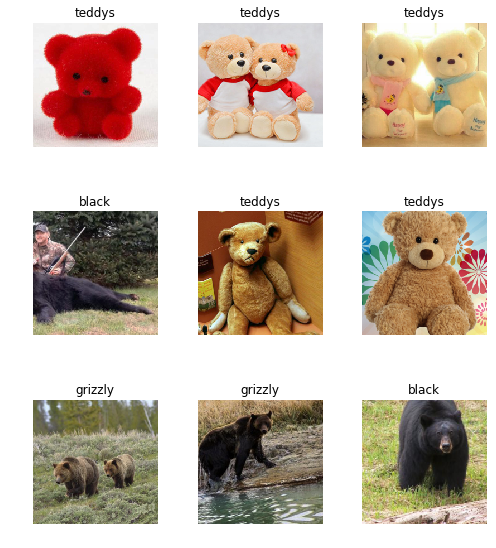

In [20]:
data.show_batch(rows=3, figsize=(7,8))

`data.c` is the attribute that tell us how many possible labels there are. We can see how many things are now training set, how many things are in validation set. So we've got 444 in the training set and 110 in the validation set.

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 444, 110)

## Train Model

Now that we are comfortable with the data, let's create the CNN and train it. Jeremy uses (so far) ResNet34. We will print the error rate for each epoch.  we can go ahead and create our convolutional neural network using that data. I tend to default to using a resnet34, and let's print out the error rate each time.

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

This runs pretty quickly on my Linux Ubuntu 18.01 hardware with a GTX 980 GPU

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.913710,0.165761,0.027273,00:04
1,0.494715,0.100621,0.027273,00:03
2,0.346817,0.113553,0.018182,00:03
3,0.278797,0.110373,0.018182,00:03


Save the current state of the model

In [24]:
learn.save('stage-1')

Jeremy's 'process' is to unfreeze the model and train again

In [25]:
learn.unfreeze()

Find the learning rate. For that we use `lr_find()`

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


On the learning rate finder, what you are looking for is the strongest downward slope that's kind of sticking around for quite a while. As Jeremy says, this is something that you will develop a feel for as you work more and more with this. No specif 'do-this', you just have to look and pick things. If you are not sure which, try a few learning rates and see which one works better. He says that since he has done this several times, he has a good feel for it and will pick something. He picked (between 10^-5 and 10^-3). I may pick something different depending on what my curve looks like (my curves don't tend to look exactly like Jeremy's)

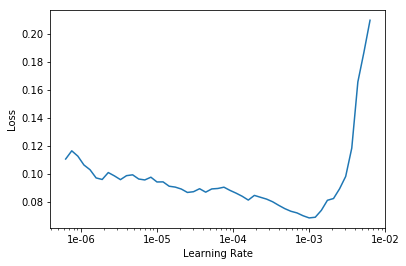

In [27]:
learn.recorder.plot()

As I suspected, my choice of learning rate will be a little different. Between 1e-04 and 1e-03. In fact a little bit after 1e-05 and before 1e-04. so I will pick 2e-4 to 6e-03

In [34]:
learn.load('stage-1')
learn.fit_one_cycle(2, max_lr=slice(1.0e-5,3.0e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.074143,0.113230,0.018182,00:03
1,0.069023,0.109477,0.018182,00:03


Now save the new state of things.

In [36]:
learn.save('stage-2')

## Intrpretation

In [37]:
learn.load('stage-2');

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

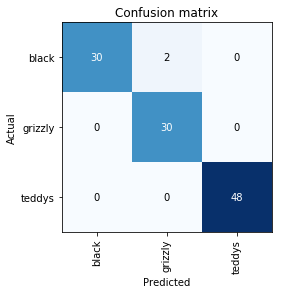

In [39]:
interp.plot_confusion_matrix()

For our setup and the number of images we ended up, looking at the confusion matrix above, we see that we made two mistakes. 2 black bears classified as grizzlys. As Jeremy says we could improve things if we clean up the dataset a little more. So that is what we are going to try on the next section.

## Cleaning up

The rest of the notebook will follow Jeremy's notebook. Very few comments unless I change things.

In [44]:
from fastai.widgets import *

The next section in Jeremy's notebook used a function called `FileDeleter`, however this has been removed from the `fast.ai` API.

See discussion here: https://forums.fast.ai/t/lesson-2-further-discussion/28706/62

It says to use instead `ImageDeleter`

**NOTE** Unfortunately I cannot get it to work. Neither `ImageRelabeler` or `ImageDeleter` can be imported from fastai.widgets. Instead I found `ImageCleaner` mentioned in this discussion thread: https://forums.fast.ai/t/lesson-2-further-discussion/28706/99. The example appeared to be wrong so I have to look at the docs `??ImageCleaner` and discovered that there needed to be a `path` variable. Adding that caused the `ImageCleaner` to work. From this point on, I am not sure how the manipulation of the cleaned data will be handled since it appears that the original Lesson 2 notebook was done based on `FileDeleter`,

ImageCleaner handles things differentely as it apparently saves its changes to a `csv` file. To use your changed dataset you just need to build a new ImageDataBunch.from_csv and use your cleaned.csv. The example for how to do this is in this notebook at the begining of the "View Data Section":

`# If you already cleaned your data, run this cell instead of the one before
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
       ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)`


The discussiokn thread still poses a few more difficulties that I am not sure I understand, so until I do I think I am going to skip this Cleaning up section and any work related to it.  Too bad because this is something that I am pretty sure I will need to do later.

Running the widget (but not doing anything to the picture) does show me that there are pictures that I would like to clean up. For example one that has two bears and other info, one that actually has a grizzly and a black beaar in the same image! These things are noise and in reality should be removed.

In [54]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

Even thogh I am showing the pictures from the `ImageCleaner` widget, I did not do anythng with it, per my comments in the previous cell.

In [55]:
# Uncomment the next line to see documentation for ImageCleaner
# ??ImageCleaner
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the ds_type param which no longer has any effect. See the thread for more details.

### TODO##
Should recreate the ImageBunch from the new `cleaned.csv` to indlude the changes made in our data. Note that it has been created if you look at the directory. The `deleted.csv` file does contain a new cleaned up dataset

In [82]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
       ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [83]:
path.ls()

[PosixPath('data/bears/teddys'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/urls_black.csv'),
 PosixPath('data/bears/urls_teddys.csv'),
 PosixPath('data/bears/cleaned.csv'),
 PosixPath('data/bears/black')]

In [84]:
# Check the data classes

data.classes

['black', 'grizzly', 'teddys']

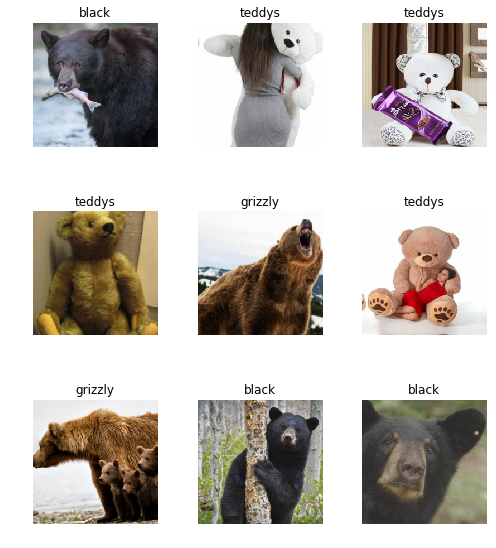

In [85]:
data.show_batch(rows=3, figsize=(7,8))

In [86]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 348, 86)

As you can see, we have less images since we cleaned up some above

In [87]:
# Create a model - will use a new name to avoid confusing it with the
# one we created above
learn_clean = cnn_learner(data, models.resnet34, metrics=error_rate)

Fit the new model

In [88]:
learn_clean.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.286213,0.262889,0.127907,00:03
1,0.705979,0.053884,0.011628,00:02
2,0.487297,0.044325,0.011628,00:02
3,0.378174,0.039895,0.011628,00:02


In [89]:
# Save new model
learn_clean.save('stage-1-cleaned')

In [90]:
#Unfreeze
learn_clean.unfreeze()

In [91]:
# Find learning rate
learn_clean.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


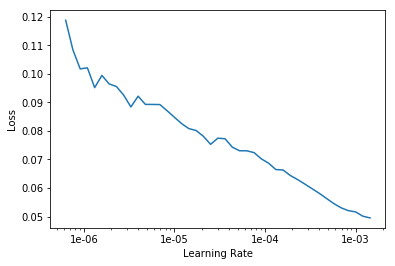

In [92]:
learn_clean.recorder.plot()

In [93]:
learn_clean.load('stage-1-cleaned')
learn.fit_one_cycle(2, max_lr=slice(0.5e-5,5e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.055670,0.120477,0.018182,00:03
1,0.042119,0.123041,0.018182,00:03


In [94]:
learn_clean.save('stage-2-clean')

In [96]:
interp = ClassificationInterpretation.from_learner(learn_clean)

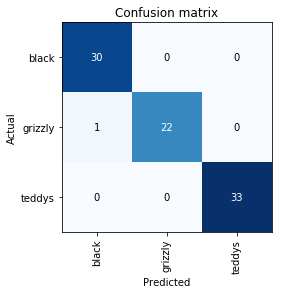

In [97]:
interp.plot_confusion_matrix()

## Put Model into Production

Export model. I am using the one before the cleaning

In [98]:
learn.export()

In [99]:
defaults.device = torch.device('cpu')

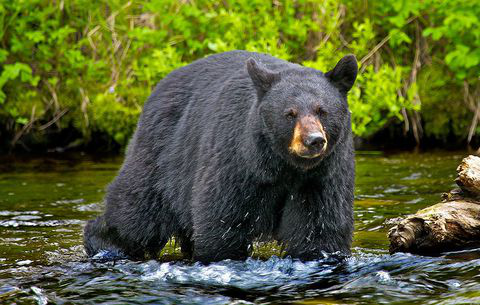

In [100]:
img = open_image(path/'black'/'00000021.jpg')
img

Create a production learner

In [101]:
learn_prod = load_learner(path)

In [102]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

### The End
So this is the end of this notebook. THe original notebook has a section that is incredibly useful. Called "Things that can go wrong" You should review it and internalize